In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, f_oneway, pearsonr
from sklearn.linear_model import LinearRegression
from scipy import stats

#### Read the dataset in the csv file from the URL


In [102]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

In [103]:
df=df.iloc[:,1:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0, 0.5, 'Median Home Value (in Thousands of Dollars)')

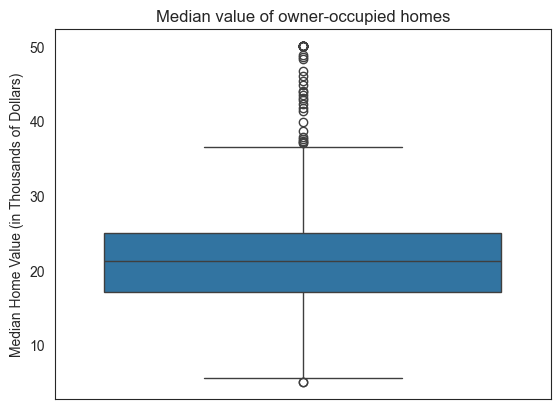

In [104]:

sns.boxplot(df['MEDV'])
plt.title('Median value of owner-occupied homes')
plt.ylabel('Median Home Value (in Thousands of Dollars)')

([<matplotlib.axis.XTick at 0x208a486db10>,
 [Text(0.0, 0, 'Not Near River'), Text(1.0, 0, 'Near River')])

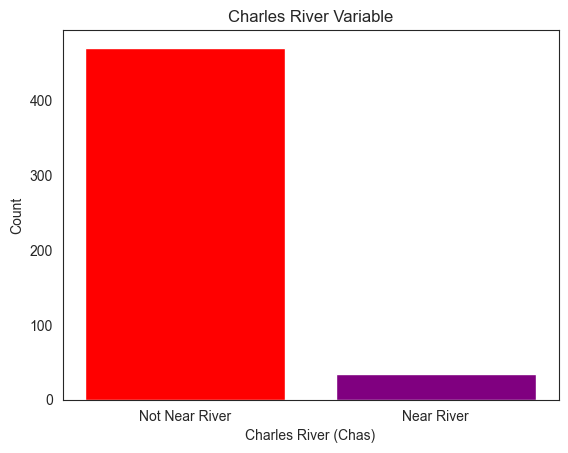

In [105]:
# Count the occurrences of each unique value in 'Chas'
chas_counts = df['CHAS'].value_counts()

# Create a bar plot
plt.bar(chas_counts.index, chas_counts.values, color=['red', 'purple'])

# Customize the bar plot (optional)
plt.title('Charles River Variable')
plt.xlabel('Charles River (Chas)')
plt.ylabel('Count')
plt.xticks(chas_counts.index, labels=['Not Near River', 'Near River'])

In [106]:
#FIND MAXIMUM AGE TO SET BIN SIZE
df["AGE"].max()

np.float64(100.0)

C:\Users\User\AppData\Local\Temp\ipykernel_13916\1324613706.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['age_group'] == label]['MEDV'] for label in labels], labels=labels)


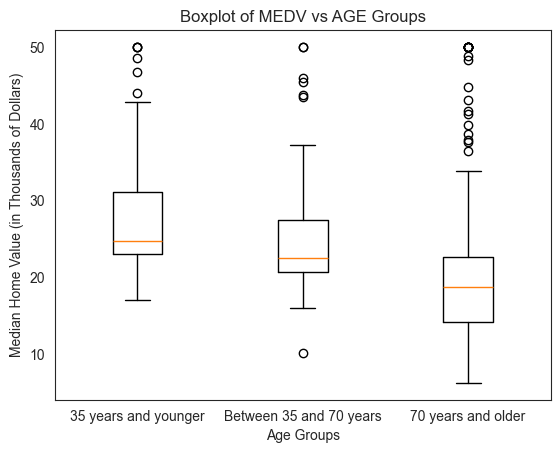

In [107]:
# Discretize the AGE variable into three groups/bins
#bins will be (0,35), (35, 70), (70,100)
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
df['age_group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.boxplot([df[df['age_group'] == label]['MEDV'] for label in labels], labels=labels)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Home Value (in Thousands of Dollars)')
plt.show()

Text(0, 0.5, 'Nitric Oxide Concentrations (NOX)')

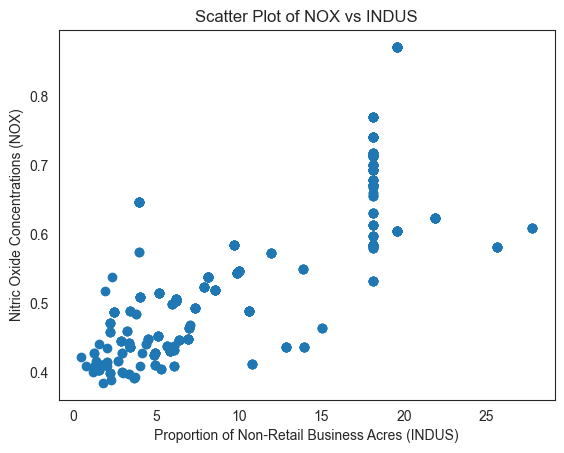

In [108]:
plt.scatter(df['INDUS'], df['NOX'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')

Text(0, 0.5, 'Frequency')

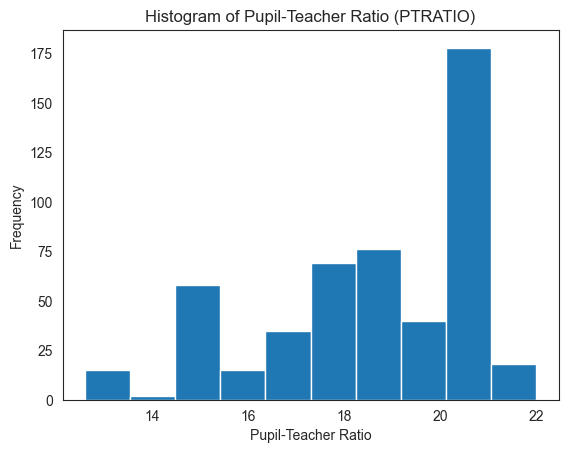

In [109]:
plt.hist(df['PTRATIO'], bins=10)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

**Let's conduct hypothesist esting to answer the folllowing questions:**

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

For each, we will state the hypothesis and use α = 0.05


**Is there a significant difference in median value of houses bounded by the Charles river or not?**

Null Hypothesis: There is no significant difference in median values of houses bounded by the Charles River and those not bounded by the river.

Alternative Hypothesis: There is a significant difference in median values of houses bounded by the Charles River and those not bounded by the river.


In [110]:
chas_bounded = df[df['CHAS'] == 1]['MEDV']
chas_not_bounded = df[df['CHAS'] == 0]['MEDV']

# Perform t-test
t_test = ttest_ind(chas_bounded, chas_not_bounded)
t_test

TtestResult(statistic=np.float64(3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

Since *p=7.39e-05<0.05,* we reject the null hypothesis and state that ther is a significant difference in median house values.

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?**

Null Hypothesis: There is no significant difference in median values of houses across different proportions of owner occupied units built prior to 1940.

Alternative Hypothesis: There is a significant difference in median values of houses across different proportions of owner occupied units built prior to 1940.

In [144]:
ols_formula = 'MEDV ~ C(age_group)'
model = ols(formula = ols_formula, data = df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(age_group),4339.074039,2.0,30.56684,3.435569e-13
Residual,32649.336069,460.0,NaN,NaN


The p value is less than 0.05, therefore we reject the null hypothesis meaning that there is a significant difference in median values of houses across different proportions of owner occupied units built prior to 1940.

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

Null Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [127]:
correlation_coefficient, p_value = pearsonr(df['NOX'], df['INDUS'])
print(correlation_coefficient)
print(p_value)

0.763651446920915
7.913361061241532e-98


Since *p=7.91e-98<0.05*, we reject the null hypothesis and cannot conclude this question since there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?**

In [145]:
ols_formula1 = 'MEDV ~ DIS'
model1 = ols(formula = ols_formula1, data = df).fit()
sm.stats.anova_lm(model1, typ=2)

,sum_sq,df,F,PR(>F)
DIS,2668.246572,1.0,33.57957,1.206612e-08
Residual,40048.048843,504.0,NaN,NaN


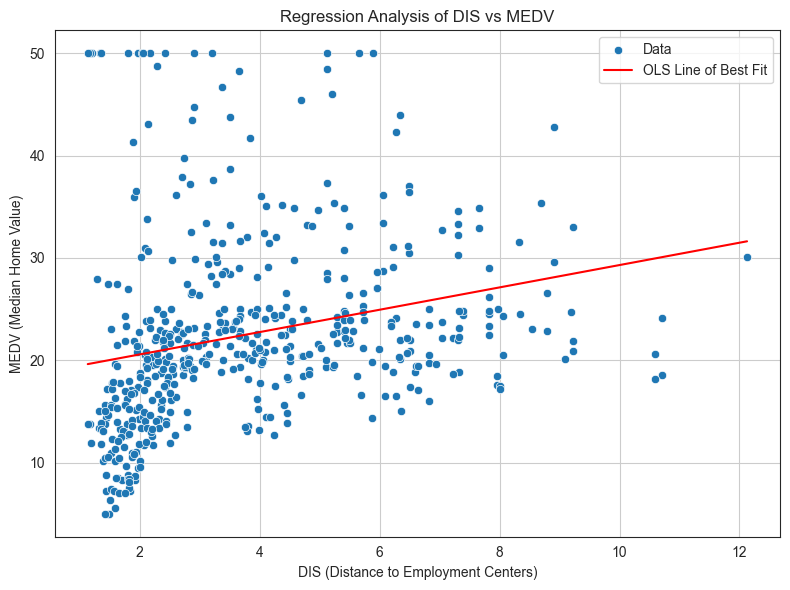

Intercept: 18.39008833049339
Slope: 1.0916130158411075


In [154]:
# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DIS', y='MEDV', data=df, label='Data')

# Line of best fit
x_vals = pd.Series(sorted(df['DIS']))
y_vals = model1.predict(pd.DataFrame({'DIS': x_vals}))
plt.plot(x_vals, y_vals, color='red', label='OLS Line of Best Fit')

# Labels and legend
plt.xlabel('DIS (Distance to Employment Centers)')
plt.ylabel('MEDV (Median Home Value)')
plt.title('Regression Analysis of DIS vs MEDV')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Obtain coefficients
intercept = model1.params.get('Intercept')
slope = model1.params.get('DIS')

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")